<a href="https://colab.research.google.com/github/mathieu-duverne/California_Housing_Price_Prediction/blob/main/California_Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California Housing Price Prediction
The purpose of the project is to predict median house values in Californian districts, given many features from these districts.

## Librairie

In [1]:
# ---- Cleanup Transform and Modify Data ---- #
import numpy as np
import pandas as pd 

# ---- Operating system ----#
import os

# ---- Data Vizualisation ---- #
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# --- DATA pre processing --- #
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# --- 
from sklearn.model_selection import train_test_split

# ----- Modèle de Machine Learning ----- #
# --- Regression linéaire --- #
from sklearn.linear_model import LinearRegression

# --- Decision tree regressor --- #
from sklearn.tree import DecisionTreeRegressor

# --- random forest regressor --- #
from sklearn.ensemble import RandomForestRegressor

# --- metrique --- #
from sklearn import metrics


# GET DATA

In [2]:
app = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housing.csv')
print('Training data shape: ', app.shape)
app.head(3)

Training data shape:  (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


# Basic Data Analysis or Exploratory Data Analysis

shape (ligne, colonne)

In [3]:
app.shape

(20640, 10)

Names of columns

In [4]:
app.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## hist on all columns of dataset

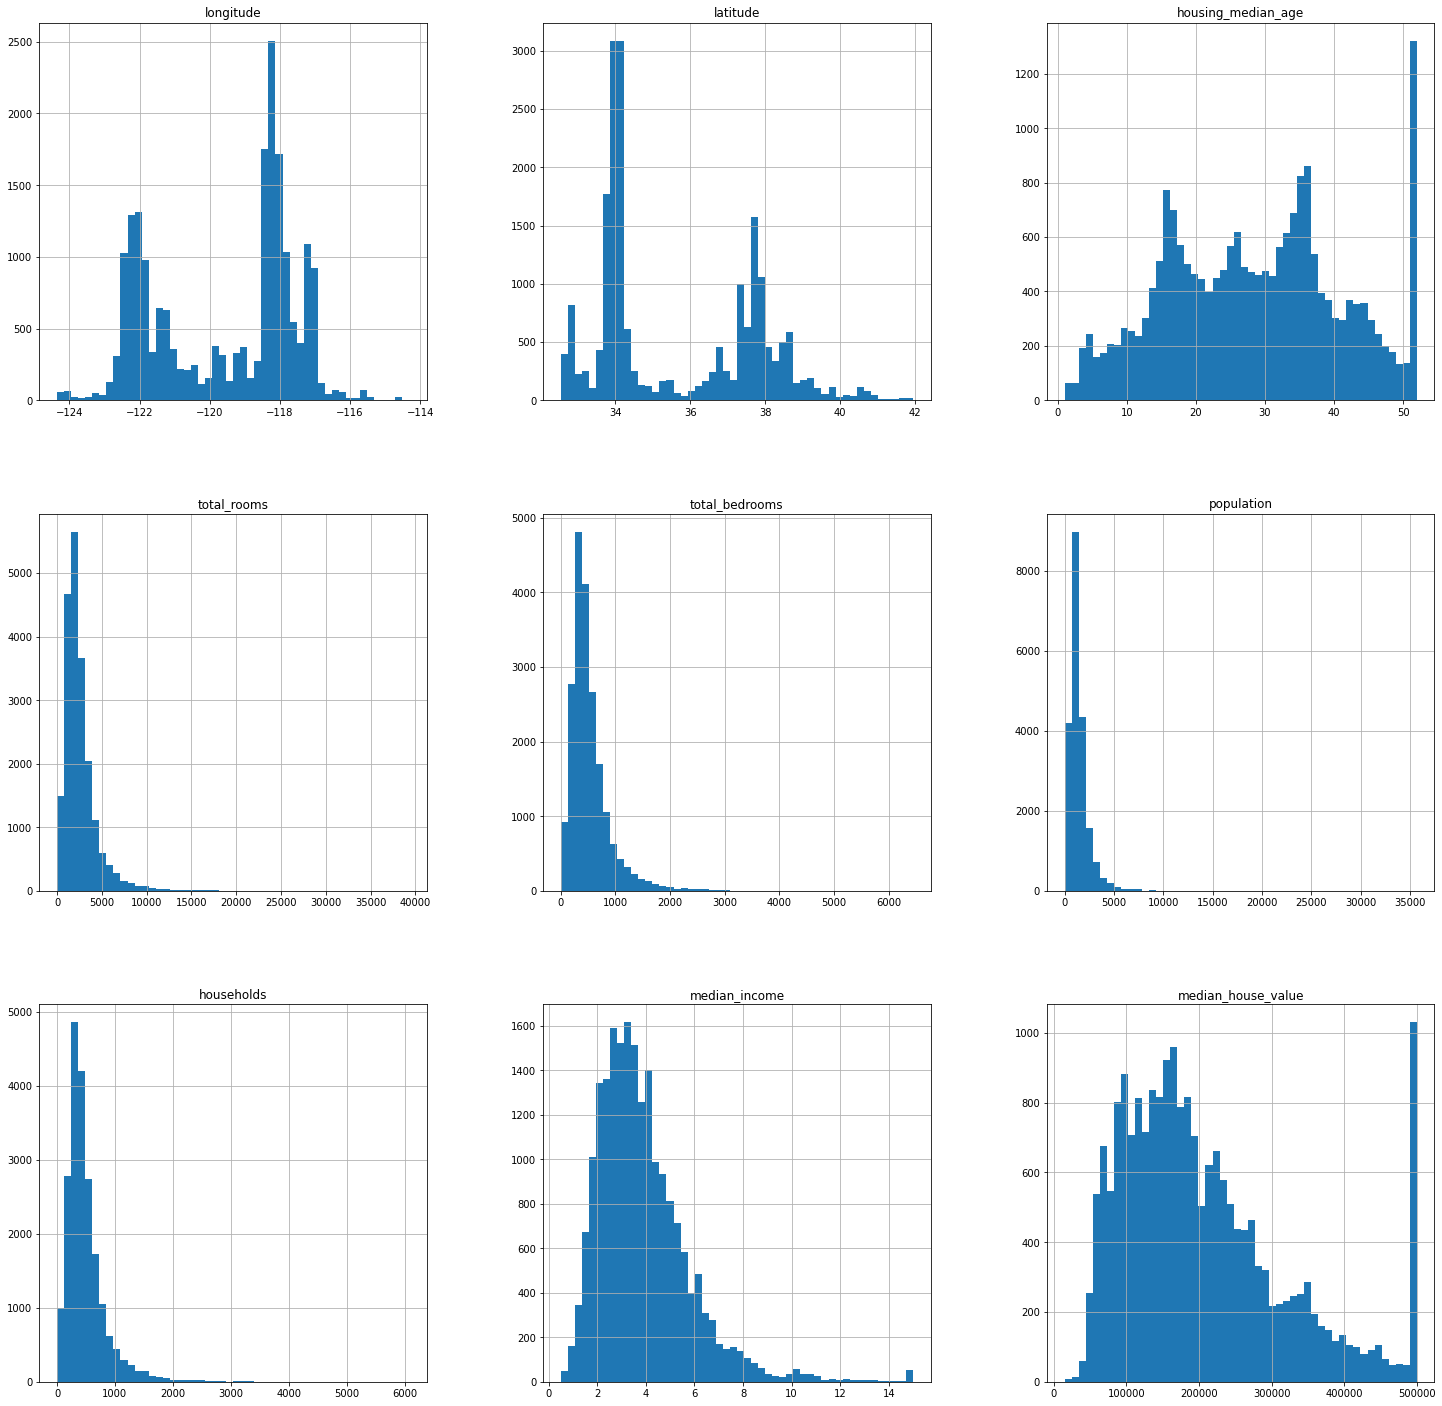

In [5]:
app.hist(figsize=(25,25),bins=50);

## BoxPlot total Total rooms

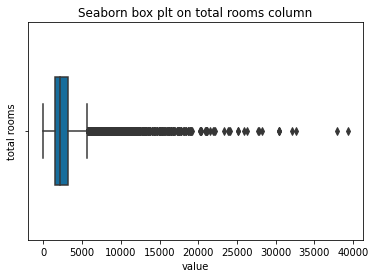

In [6]:
sboxplot = sns.boxplot(x='total_rooms', 
                 data=app, 
                 width=0.5,
                 palette="colorblind")

#if there are too many points, then don't bother with the scatter.  It'll be saturated.
if(len(app) <= 200):
    # add stripplot to boxplot with Seaborn
    sboxplot=sns.stripplot(x='total_rooms',
                       data=app, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.5,
                       color='black')
    
plt.title("Seaborn box plt on total rooms column")
plt.xlabel("value")
plt.ylabel("total rooms")
plt.show()

## scatter plot latitude longitude

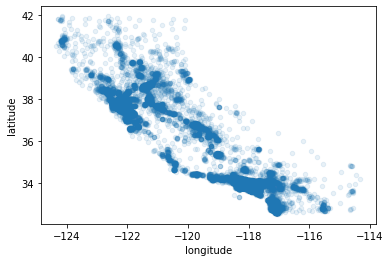

In [7]:
app.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

## Same scatter + populaion density + median house value 

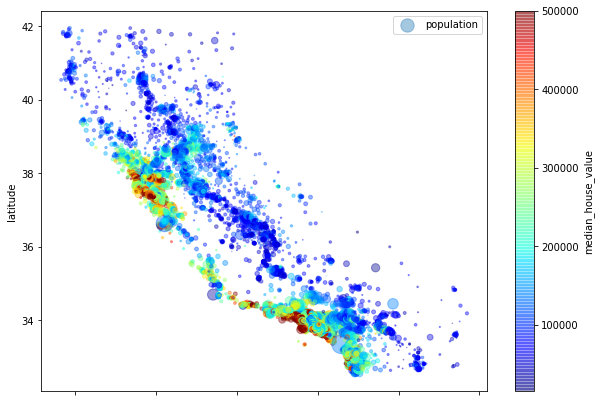

In [8]:
app.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=app["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

Types of columns

In [9]:
app.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

ocean proximity column is a object

In [10]:
app["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

## Describe dataset for more informations 

In [11]:
app.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Missing values of columns

In [12]:
def missing_values(df):
        # total of null value  
        mis_val = df.isnull().sum()
        
        # missing value percentage
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # create table with missing value and percentage
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # rename columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Valeurs manquantes', 1 : '% totale des valeurs'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% totale des valeurs', ascending=False).round(1)
        
        # display summary
        print ("Ils y a dans ce dataframe : " + str(df.shape[1]) + " colonne.\n"      
            "Ils y a " + str(mis_val_table_ren_columns.shape[0]) +
              " colonnes avec des valeurs manquantes.")
        
        # return dataframe with summary
        return mis_val_table_ren_columns

In [13]:
missing_values(app)

Ils y a dans ce dataframe : 10 colonne.
Ils y a 1 colonnes avec des valeurs manquantes.


,Valeurs manquantes,% totale des valeurs
total_bedrooms,207,1.0


## Encoding column ocean proximity 

ocean proximity transform in 4 columns for all categori

In [14]:
app = pd.get_dummies(app, columns=["ocean_proximity"])
app.shape

(20640, 14)

## Impute missing value of total bedrooms  

there are only 1 percent missing values in the column total_bedrooms

In [15]:
imputer = SimpleImputer(strategy = "median")
imputer.fit(app.iloc[:,4:5])
app.iloc[:,4:5] = imputer.transform(app.iloc[:,4:5])
app.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

## Attribute Combinations

Sometime, the combinations of attributes are more meaningful and interesting in terms of solving the business problems, e.g.,

  - rooms per household: total # of rooms per district is not useful but rooms per household may be interesting
  
  - bedroom/total room ratio

  - population per household

In [16]:
# calculated attributes
app['rooms_per_household'] = app['total_rooms']/app['households']
app['bedrooms_per_room'] = app['total_bedrooms']/app['total_rooms']
app['population_per_household'] = app['population']/app['households']

## Correlation on the dataset

In [17]:
corr_matrix = app.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
rooms_per_household           0.151948
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049457
ocean_proximity_ISLAND        0.023416
population_per_household     -0.023737
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
bedrooms_per_room            -0.233303
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

# Split the dataset 

In [18]:
app_features = app.drop("median_house_value",axis=1)
print(app_features.head())
app_target = app["median_house_value"]
print("Medain Housing Values")
print(app_target.head())

   longitude  latitude  ...  bedrooms_per_room  population_per_household
0    -122.23     37.88  ...           0.146591                  2.555556
1    -122.22     37.86  ...           0.155797                  2.109842
2    -122.24     37.85  ...           0.129516                  2.802260
3    -122.25     37.85  ...           0.184458                  2.547945
4    -122.25     37.85  ...           0.172096                  2.181467

[5 rows x 16 columns]
Medain Housing Values
0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


## Train & Test split 80% train and 20% test dataset

In [19]:

X_train, X_test, y_train, y_test = train_test_split(app_features, app_target, test_size=0.2,random_state=42)

# check shape
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (16512, 16) and size 264192
X_test shape (4128, 16) and size 66048
y_train shape (16512,) and size 16512
y_test shape (4128,) and size 4128


# Standardize the data

Feature scaling is to bring all the independent variables in a dataset into same scale, to avoid any variable dominating  the model. Here we will not transform the dependent variables.

In [20]:
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)
print(X_train[0:5,:])
print("test data")
print(X_test[0:5,:])

[[ 1.27258656 -1.3728112   0.34849025  0.22256942  0.21122752  0.76827628
   0.32290591 -0.326196   -0.89468316 -0.68057418 -0.01556621 -0.35564565
   2.62975816 -0.17491646 -0.2117846   0.05137609]
 [ 0.70916212 -0.87669601  1.61811813  0.34029326  0.59309419 -0.09890135
   0.6720272  -0.03584338 -0.89468316 -0.68057418 -0.01556621 -0.35564565
   2.62975816 -0.40283542  0.34218528 -0.11736222]
 [-0.44760309 -0.46014647 -1.95271028 -0.34259695 -0.49522582 -0.44981806
  -0.43046109  0.14470145 -0.89468316 -0.68057418 -0.01556621 -0.35564565
   2.62975816  0.08821601 -0.66165785 -0.03227969]
 [ 1.23269811 -1.38217186  0.58654547 -0.56148971 -0.40930582 -0.00743434
  -0.38058662 -1.01786438 -0.89468316 -0.68057418 -0.01556621 -0.35564565
   2.62975816 -0.60001532  0.78303162  0.07750687]
 [-0.10855122  0.5320839   1.14200767 -0.11956547 -0.25655915 -0.48587717
  -0.31496232 -0.17148831 -0.89468316  1.46934754 -0.01556621 -0.35564565
  -0.3802631   0.3490073  -0.55036364 -0.06883176]]
test

# Model Regression

## Linear Regression

In [21]:
#initantiate the linear regression
linearRegModel = LinearRegression(n_jobs=-1)
#fit the model to the training data (learn the coefficients)
linearRegModel.fit(X_train,y_train)
#print the intercept and coefficients 
print("Intercept is "+str(linearRegModel.intercept_))
print("coefficients  is "+str(linearRegModel.coef_))

Intercept is 207194.69373788772
coefficients  is [-56276.05885186 -56638.23115891  14122.30475198   5881.10498027
   5307.66299678 -46320.28547056  40233.72484825  78904.43939684
   5711.19317293 -10911.1750257    2213.28812161   1910.21649014
   4814.89214678   7699.44848838  16809.10455136    750.3679429 ]


## Prediction of linear regression

In [22]:
y_pred = linearRegModel.predict(X_test)

### Data viz on actual value and prediction value

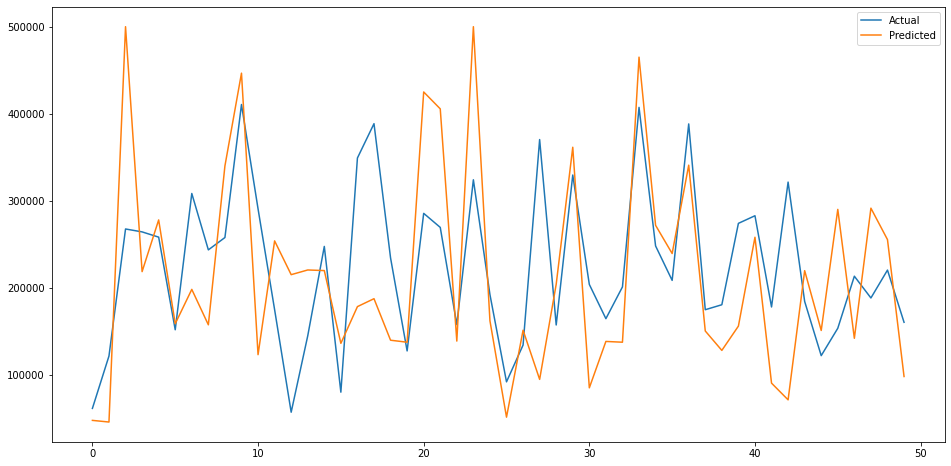

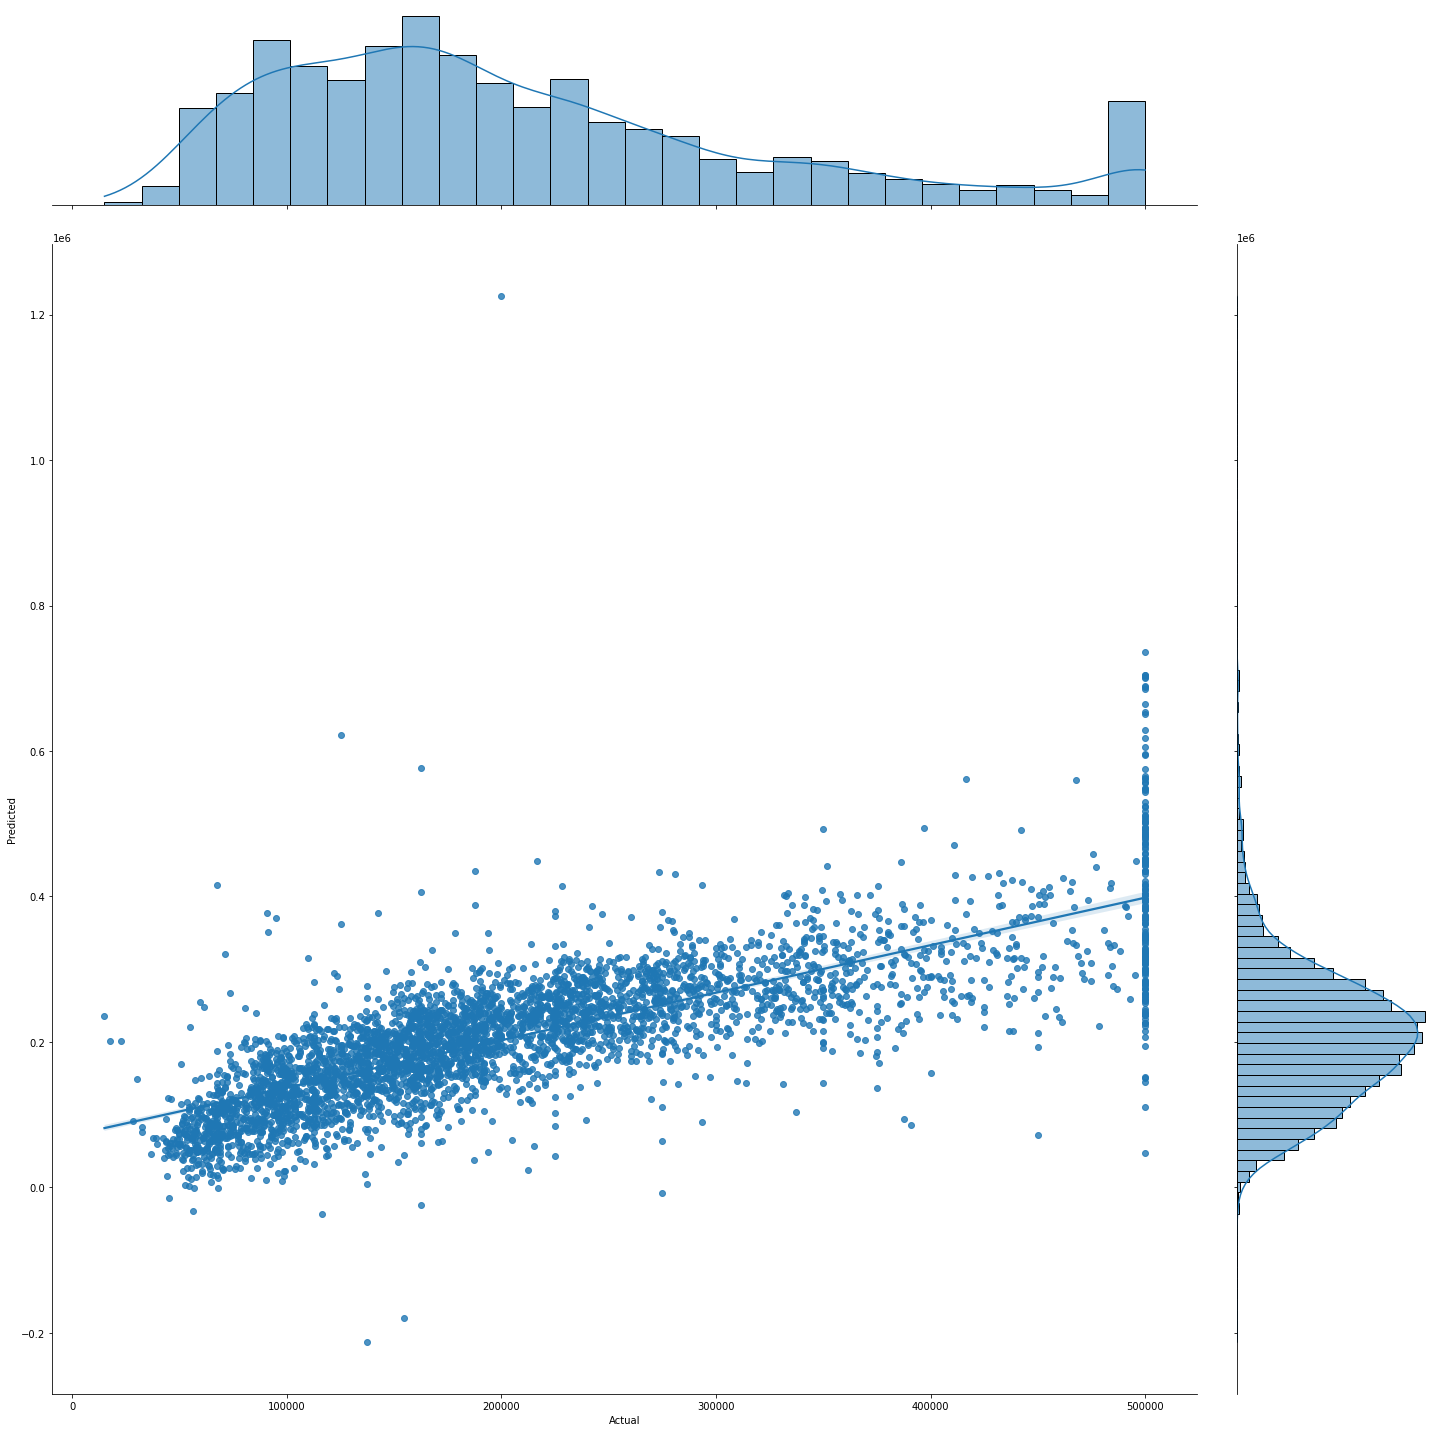

In [23]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',height=20);

### Root Mean Squared Error (RMSE)

une mesure fréquemment utilisée des différences entre les valeurs prédites par un modèle ou estimateur et les valeurs observées.

In [24]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

72668.53837868223
67593.20745775253


## Decision Tree Regression

In [25]:
dtReg = DecisionTreeRegressor(max_depth=9)
dtReg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

## Prediction of Decision tree regression

In [26]:
dtReg_y_pred = dtReg.predict(X_test)

### Data viz on actual value and prediction value

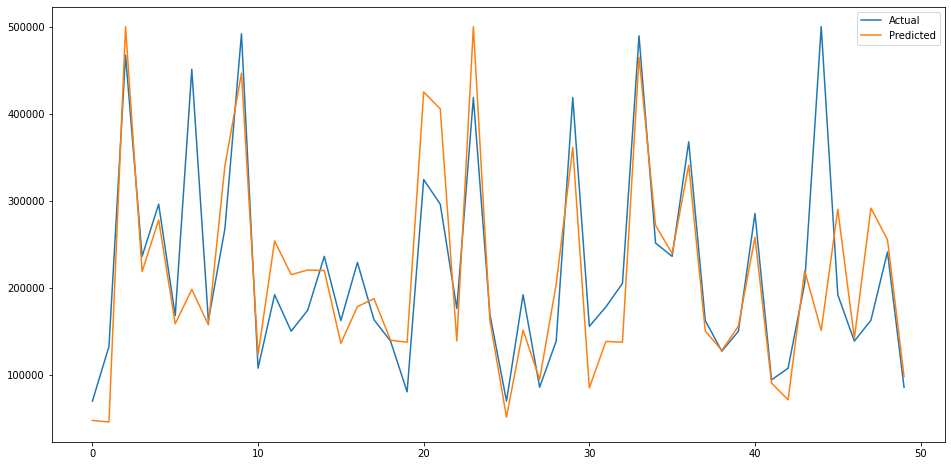

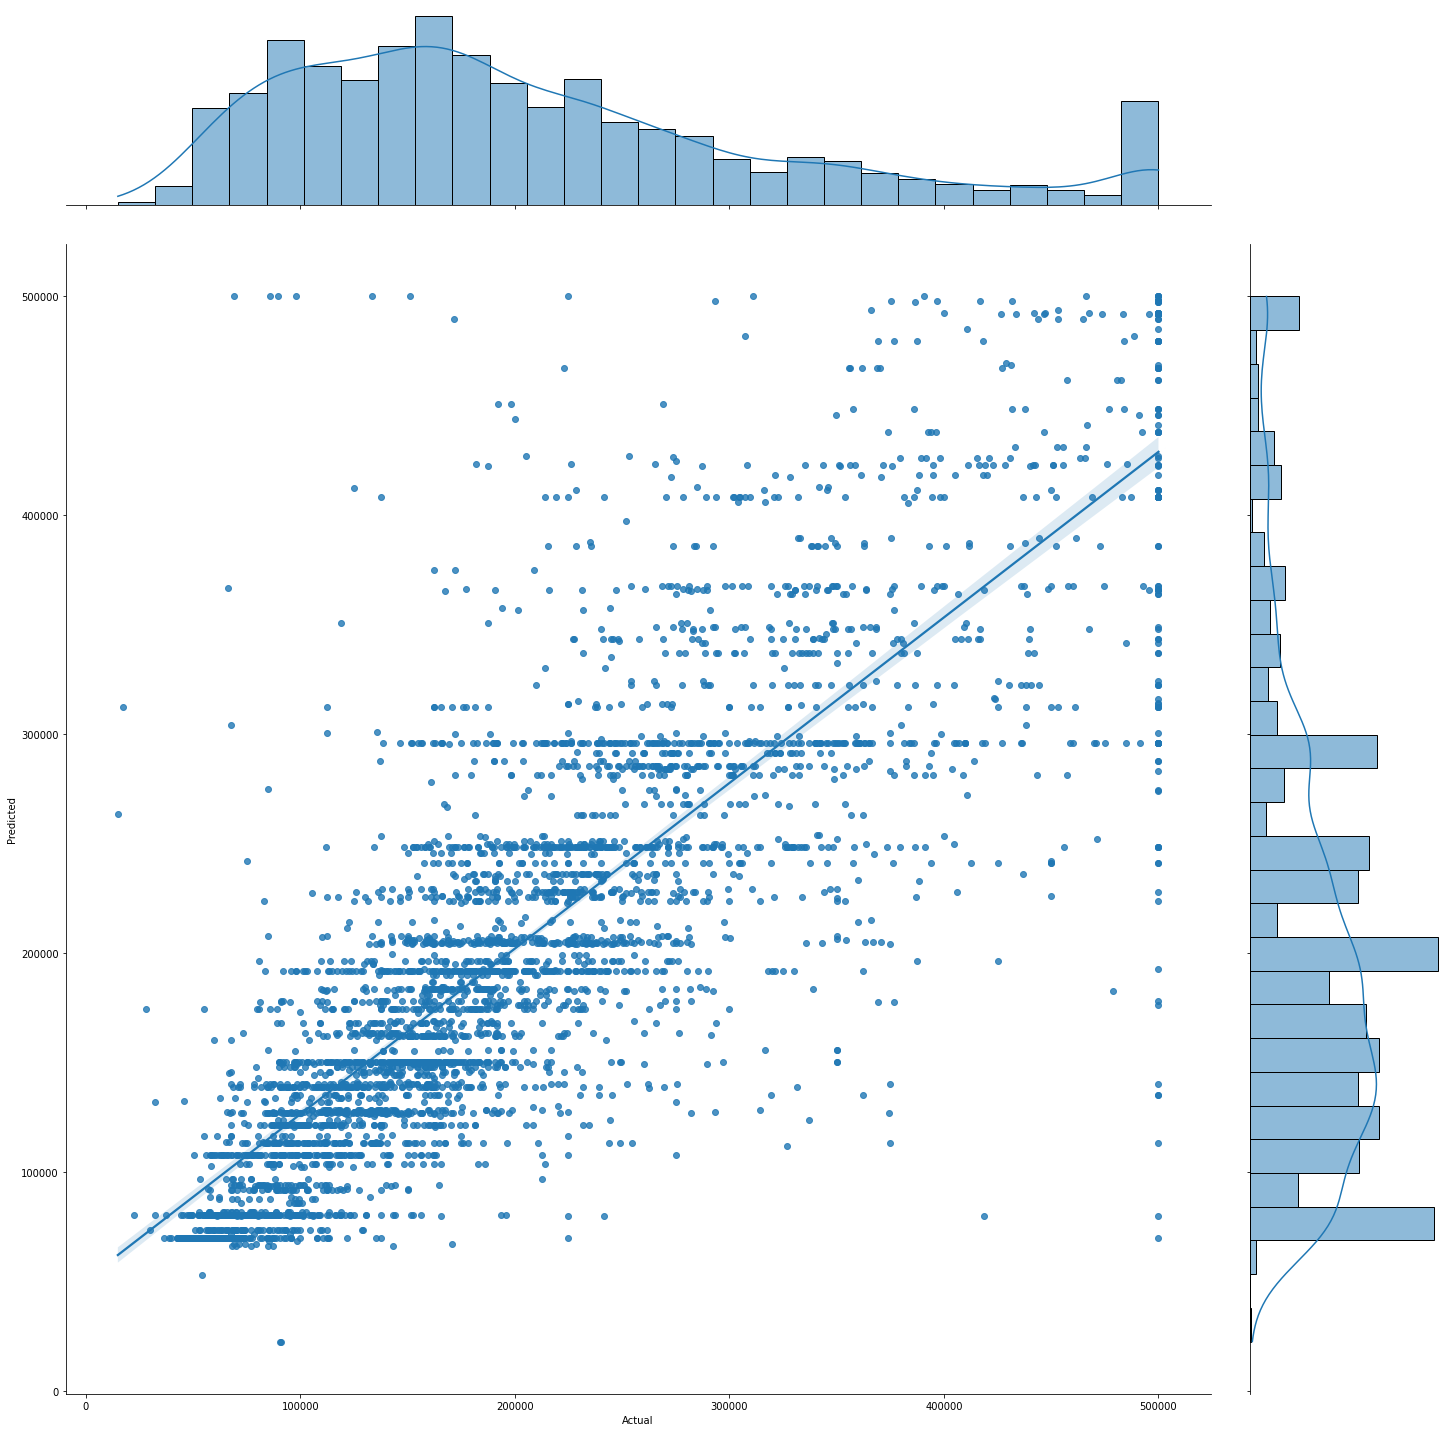

In [27]:
test = pd.DataFrame({'Predicted':dtReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg", height=20)

### Root Mean Squared Error (RMSE)

In [28]:
print(np.sqrt(metrics.mean_squared_error(y_test,dtReg_y_pred)))

63842.090839291755


# Linear regression with one independent Variable

Extract just the median_income column from the independent variables (from X_train and X_test). Perform Linear Regression to predict housing values based on median_income. Predict output for test dataset using the fitted model. Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [29]:
#Extract median_income 
dropcol = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "ocean_proximity_<1H OCEAN",	"ocean_proximity_INLAND",	"ocean_proximity_ISLAND",	"ocean_proximity_NEAR BAY", "ocean_proximity_NEAR OCEAN"]
print(dropcol)
app_med = app_features.drop(dropcol,axis=1)
print(type(app_med))

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
<class 'pandas.core.frame.DataFrame'>


In [30]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(app_med, app_target, test_size=0.25, random_state=42)

print("X_train2 shape {} and size {}".format(X_train2.shape,X_train2.size))
print("X_test2 shape {} and size {}".format(X_test2.shape,X_test2.size))
print("y_train2 shape {} and size {}".format(y_train2.shape,y_train2.size))
print("y_test2 shape {} and size {}".format(y_test2.shape,y_test2.size))

X_train2 shape (15480, 4) and size 61920
X_test2 shape (5160, 4) and size 20640
y_train2 shape (15480,) and size 15480
y_test2 shape (5160,) and size 5160


In [31]:
linReg2 = LinearRegression()
linReg2.fit(X_train2,y_train2)

LinearRegression()

In [32]:
y_pred2 = linReg2.predict(X_test2)

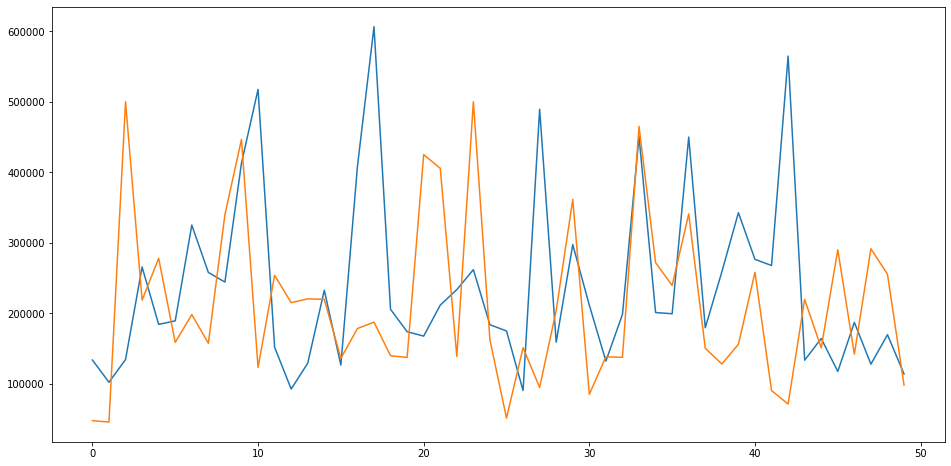

In [33]:
test = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])

Text(0, 0.5, ' Predicted median_house_value')

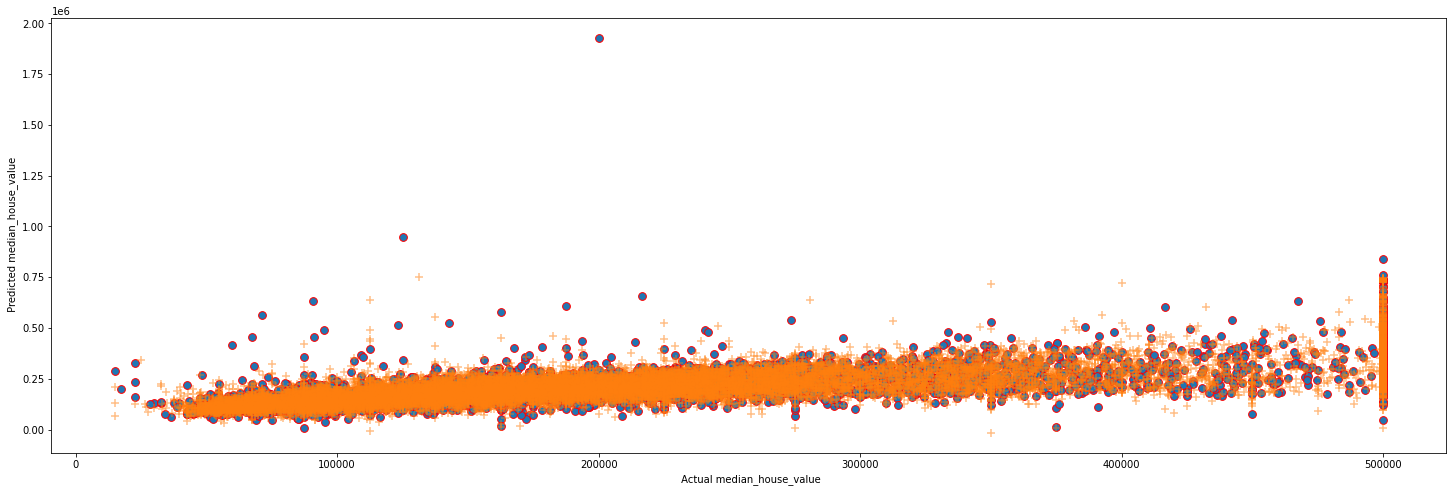

In [34]:
fig = plt.figure(figsize=(25,8))
plt.scatter(y_test2,y_pred2,marker="o",edgecolors ="r",s=60)
plt.scatter(y_train2,linReg2.predict(X_train2),marker="+",s=50,alpha=0.5)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")

The median_income , totat_bedrooms have highly skewed data.The data is highly unbalance.